In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import talos
%matplotlib inline

In [2]:
# load dataset
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("forest_fire/Training and Validation/",
                                          target_size=(250,250),
                                          batch_size = 32,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory("forest_fire/Testing/",
                                          target_size=(250,250),
                                          batch_size =32,
                                          class_mode = 'binary')

Found 1832 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [3]:
test_dataset.class_indices

{'fire': 0, 'nofire': 1}

# Training & Testing the MLP models

In [4]:
input_size  = 250 * 250 * 3

In [5]:
# Input data and params into the function

from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Flatten())
model.add(Dense(32, input_dim=input_size,
                    activation='relu'))
model.add(Dropout(0.2))
    
'''## hidden layers if any
    for i in range(params['hidden_layers']):
        model.add(Dense(params['hidden_units'], 
                        activation=params['activation']))
        model.add(Dropout(params['dropout']))'''
        

model.add(Dense(1, activation='sigmoid'))
    
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    
history = model.fit(train_dataset,
         epochs = 5,
         validation_data = test_dataset)

Epoch 1/5
58/58 [==============================] - 5s 72ms/step - loss: 2.9660 - accuracy: 0.8062 - val_loss: 0.4037 - val_accuracy: 0.8676
Epoch 2/5
58/58 [==============================] - 4s 67ms/step - loss: 0.3434 - accuracy: 0.8592 - val_loss: 0.4043 - val_accuracy: 0.8382
Epoch 3/5
58/58 [==============================] - 4s 66ms/step - loss: 0.3716 - accuracy: 0.8401 - val_loss: 0.3479 - val_accuracy: 0.8529
Epoch 4/5
58/58 [==============================] - 4s 67ms/step - loss: 0.2948 - accuracy: 0.8788 - val_loss: 0.3251 - val_accuracy: 0.8971
Epoch 5/5
58/58 [==============================] - 4s 67ms/step - loss: 0.2877 - accuracy: 0.8974 - val_loss: 0.3734 - val_accuracy: 0.8676


In [6]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

3/3 [==============================] - 0s 37ms/step


In [7]:
predictions

array([[1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)

In [8]:
print(len(predictions))

68


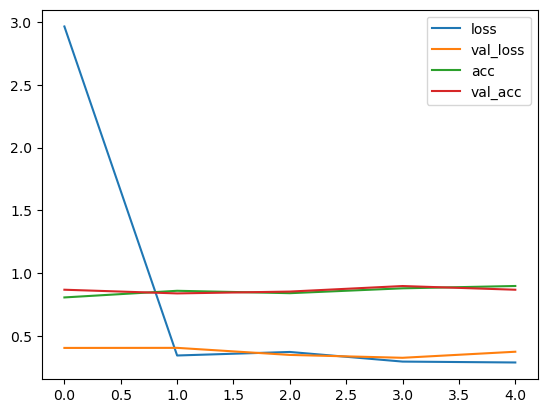

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

In [14]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(250,250))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        plt.xlabel("No Fire",fontsize=30)
    elif val == 0:
        plt.xlabel("Fire",fontsize=30)

1/1 [==============================] - 0s 47ms/step
[[0.]]


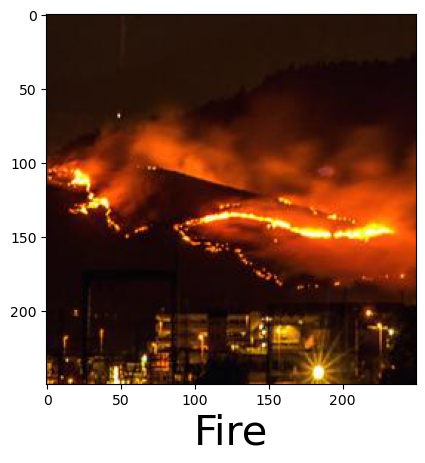

In [15]:
predictImage("forest_fire/Testing/fire/abc182.jpg")

1/1 [==============================] - 0s 16ms/step
[[1.]]


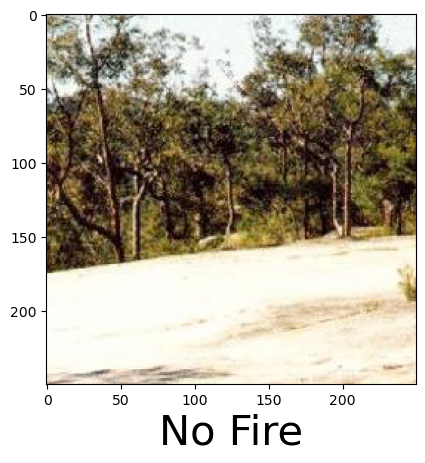

In [17]:
predictImage('forest_fire/Testing/nofire/abc361.jpg')